# Titanic
https://www.kaggle.com/c/titanic/data

In [540]:
import numpy as np
import pandas as pd
%matplotlib inline

In [428]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [23]:
for i in ['Sex', 'Pclass', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked']:
    print '{}: {}'.format(i, train.loc[:,i].unique()) 

Sex: ['male' 'female']
Pclass: [3 1 2]
Age: [ 22.    38.    26.    35.      nan  54.     2.    27.    14.     4.    58.
  20.    39.    55.    31.    34.    15.    28.     8.    19.    40.    66.
  42.    21.    18.     3.     7.    49.    29.    65.    28.5    5.    11.
  45.    17.    32.    16.    25.     0.83  30.    33.    23.    24.    46.
  59.    71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5   51.
  55.5   40.5   44.     1.    61.    56.    50.    36.    45.5   20.5   62.
  41.    52.    63.    23.5    0.92  43.    60.    10.    64.    13.    48.
   0.75  53.    57.    80.    70.    24.5    6.     0.67  30.5    0.42
  34.5   74.  ]
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Cabin: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B

In [384]:
train[train['Cabin'].isnull()][:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S


In [446]:
age_mean = np.mean(train['Age'][~train.Age.isnull()])
age_mean

29.69911764705882

In [448]:
train[~train['Age'].isnull()][:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S


In [459]:
# subset of col that CONTAINS a pattern
train[train['Name'].str.contains(r'"')][:11]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.000000,0,0,330923,8.0292,missing,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,missing,Q
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,missing,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.000000,0,0,350043,7.7958,missing,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.000000,2,2,W./C. 6608,34.3750,missing,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.500000,0,2,230080,26.0000,F,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.000000,0,0,35851,7.7333,missing,Q
161,162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.000000,0,0,C.A. 33595,15.7500,missing,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.000000,0,2,363291,20.5250,missing,S
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,29.699118,1,0,370365,15.5000,missing,Q


In [152]:
# subset of col that will MATCH a pattern
train[train['Ticket'].str.match(r'[^\d]')][:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,missing,S


## Feature engineering

In [81]:
## use pandas categoricals
#train['Embarked'] = train['Embarked'].astype('category')

### Replace missing values
http://pandas.pydata.org/pandas-docs/stable/basics.html#vectorized-string-methods


In [449]:
train['Embarked'] = train['Embarked'].fillna('missing')
test['Embarked'] = test['Embarked'].fillna('missing')

In [450]:
train[train['Embarked'] == 'missing']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,missing
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,missing


In [451]:
train['Cabin'] = train['Cabin'].fillna('missing')
test['Cabin'] = test['Cabin'].fillna('missing')

In [452]:
## remove digits
train['Cabin'] = train['Cabin'].str.replace(r'(?<=[A-Z])\d+', '')
test['Cabin'] = test['Cabin'].str.replace(r'(?<=[A-Z])\d+', '')

In [453]:
train['Age'] = train['Age'].fillna(age_mean)
test['Age'] = test['Age'].fillna(age_mean)

In [454]:
test['Fare'] = test['Fare'].fillna(0)

In [455]:
## 'Ticket' does NOT MATCH all digits
train[~train['Ticket'].str.match(r'\d+')][:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,missing,S


### Add new columns

In [460]:
## function to add new columns to a df
def add_columns(data):
    data['Name_hasparen'] = data['Name'].str.contains(r'\(')
    data['Name_hasquote'] = data['Name'].str.contains(r'"')
    #data['Name_hasmaster'] = data['Name'].str.contains(r'Master\.')
    data['Name_hasmrs'] = data['Name'].str.contains(r'Mrs\.')
    data['Age_valid'] = data['Age'] != age_mean
    #data['Ticket_alldigit'] = data['Ticket'].str.match(r'\d+')

In [461]:
add_columns(train)
add_columns(test)

### Create train and test sets

In [521]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_hasparen',
       'Name_hasquote', 'Name_hasmrs', 'Age_valid'], dtype=object)

In [522]:
feature_cols = ['Pclass', 'Age', 'Sex', 'Fare', 'Cabin', 'Embarked'] 


In [523]:
Xtrain = train[feature_cols]
ytrain = train['Survived']

Xtest = test[feature_cols]

In [557]:
def convert_cols(data):
    for i in data.columns:
        if type(data[i][0]) == np.bool_:
            data[i] = data[i].astype(int)
        if type(data[i][0]) == str:
            data[i] = pd.factorize(data[i])[0]

In [554]:
type(train.Sex[0])

str

In [525]:
convert_cols(Xtest)
convert_cols(Xtrain)

/Users/jjl/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [526]:
for i in Xtest.columns:
    print i, type(Xtest[i][0])

Xtest.dtypes

Pclass <type 'numpy.int64'>
Age <type 'numpy.float64'>
Sex <type 'numpy.int64'>
Fare <type 'numpy.float64'>
Cabin <type 'numpy.int64'>
Embarked <type 'numpy.int64'>


Pclass        int64
Age         float64
Sex           int64
Fare        float64
Cabin         int64
Embarked      int64
dtype: object

In [284]:
from sklearn import cross_validation
feat_train, feat_test, label_train, label_test = cross_validation.train_test_split(Xtrain, ytrain, \
                                                                                   test_size=.2, random_state=11)

## Grid search with random forest
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


In [270]:
## number of survivors
print'{}/{}'.format(sum(ytrain), len(ytrain))

342/891


### Make scorer and cv search object

In [416]:
from sklearn import metrics
from sklearn import grid_search

f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=1)
acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)

In [624]:
from sklearn.ensemble import RandomForestClassifier
'''
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, \
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, \
                            max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, \
                            n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
'''

rf = RandomForestClassifier(n_estimators=100)

parameters = {'criterion': ('entropy', 'gini'), 
              'class_weight': ('balanced', None),
              'min_samples_split': (2,4,10)
             }
              
#reg = grid_search.GridSearchCV(rf, parameters, scoring=f1_scorer, cv=5)
reg = grid_search.GridSearchCV(rf, parameters, scoring=acc_scorer, cv=8)

In [620]:
# randomized grid search with decision tree
from sklearn.tree import DecisionTreeClassifier
import scipy

param_dist = {'min_samples_split': scipy.stats.randint(2,50),
              'max_depth':scipy.stats.randint(5,20),
              'class_weight': (None, "balanced"), 
              'criterion': ('entropy', 'gini')}

clf = DecisionTreeClassifier()

reg = grid_search.RandomizedSearchCV(clf, param_distributions=param_dist, \
                                     n_iter=10 , scoring=acc_scorer, cv=7)

### Fit the data

In [ ]:
## data splits: Xtrain, ytrain -> feat_train, feat_test, label_train, label_test
reg.fit(Xtrain, ytrain)

In [625]:
## used PCA reduced data
reg.fit(reduced_data, ytrain)  

GridSearchCV(cv=8, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': (2, 4, 10), 'criterion': ('entropy', 'gini'), 'class_weight': ('balanced', None)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [626]:
est = reg.best_estimator_
est

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Measure predictions

In [294]:
print metrics.classification_report(label_train, est.predict(feat_train))

             precision    recall  f1-score   support

          0       0.88      0.85      0.86       431
          1       0.78      0.82      0.80       281

avg / total       0.84      0.84      0.84       712



In [627]:
#print metrics.classification_report(ytrain, est.predict(Xtrain))
print metrics.classification_report(ytrain, est.predict(reduced_data))  ## predict PCA reduced data

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       549
          1       0.97      0.98      0.97       342

avg / total       0.98      0.98      0.98       891



In [520]:
print metrics.classification_report(ytrain, Xtrain.Sex)

             precision    recall  f1-score   support

          0       0.81      0.85      0.83       549
          1       0.74      0.68      0.71       342

avg / total       0.78      0.79      0.78       891



### Predict the test set

In [ ]:
# make prediction on test set
ypred = est.predict(Xtest)

In [628]:
# make prediction on PCA reduced test set
reduced_Xtest = pca.transform(test_data_transformed)
ypred = est.predict(reduced_Xtest)

In [519]:
# gender model
#ypred = Xtest.Sex

In [629]:
csv = pd.DataFrame({'PassengerId': test['PassengerId'],'Survived': ypred})

In [630]:
len(csv)

418

## Submit predictions

In [631]:
# save prediction to csv file
# numpy.savetxt("foo.csv", a, delimiter=",")
csv.to_csv(path_or_buf='rf_pca2_20160117.csv', sep=',', na_rep='', float_format=None, columns=None, \
                 header=True, index=False, index_label=None, mode='w', encoding=None, \
                 compression=None, quoting=None, quotechar='"', line_terminator='\n', \
                 chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, \
                 escapechar=None, decimal='.') 

## PCA

In [615]:
# get training data with label/target variable
all_cols = ['Pclass', 'Age', 'Sex', 'Fare', 'Cabin', 'Embarked'] 
train_data_transformed = train[all_cols]
test_data_transformed = test[all_cols]

In [616]:
convert_cols(train_data_transformed)
convert_cols(test_data_transformed)
test_data_transformed.dtypes

/Users/jjl/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Pclass        int64
Age         float64
Sex           int64
Fare        float64
Cabin         int64
Embarked      int64
dtype: object

### Pair plot

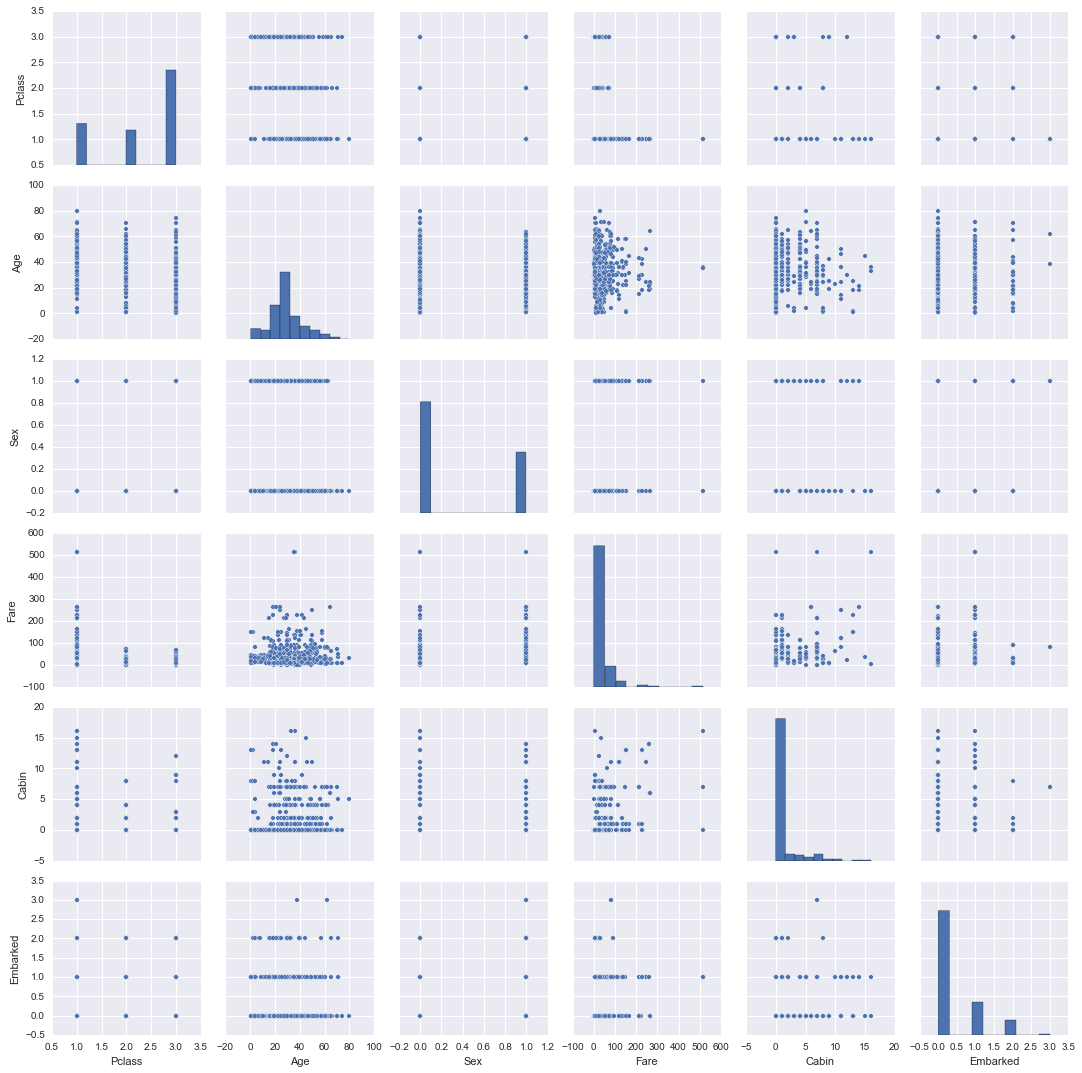

In [617]:
import seaborn as sns
sns.set()
sns.pairplot(train_data_transformed)

In [618]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=len(train_data_transformed.columns), copy=True, whiten=False)

# fit the data
pca.fit(train_data_transformed)

# Print the components and the amount of variance in the data contained in each dimension
print train_data_transformed.columns
print 'Components:\n', pca.components_
print 'Variance explained:\n', pca.explained_variance_ratio_[:3]

Index([u'Pclass', u'Age', u'Sex', u'Fare', u'Cabin', u'Embarked'], dtype='object')
Components:
[[ -9.27782041e-03   2.57128373e-02   1.74657913e-03   9.99299762e-01
    2.54725310e-02   9.26382232e-04]
 [  1.80591803e-02  -9.99438919e-01   3.78503310e-03   2.61304477e-02
   -9.89422230e-03  -8.31072069e-04]
 [ -1.13314178e-01  -1.25312198e-02   7.87860683e-03  -2.60588268e-02
    9.93106752e-01   8.43037437e-04]
 [  4.71357183e-01   7.69432739e-03   9.89622961e-02   1.85864012e-03
    5.24003658e-02   8.74768778e-01]
 [ -8.58895929e-01  -1.41445890e-02   2.37730485e-01  -5.87144470e-03
   -1.00594429e-01   4.42072638e-01]
 [ -1.63914230e-01  -6.66284718e-03  -9.66235598e-01   4.41990929e-04
   -1.12781649e-02   1.98366096e-01]]
Variance explained:
[ 0.93442981  0.06333549  0.00185345]


In [619]:
# reduce to 2 dims
pca = PCA(n_components=2, copy=True, whiten=False)
pca.fit(train_data_transformed)

reduced_data = pca.transform(train_data_transformed)

### Plot with label/target

In [574]:
reduced_lableled_data = pd.DataFrame(reduced_data)

In [581]:
reduced_lableled_data['Survived'] = train['Survived']
reduced_lableled_data.head()

,0,1,Survived
0,-25.167978,7.070975,0
1,39.277680,-7.293669,1
2,-24.392399,3.074362,1
3,21.029292,-4.768117,1
4,-24.037899,-5.918375,0


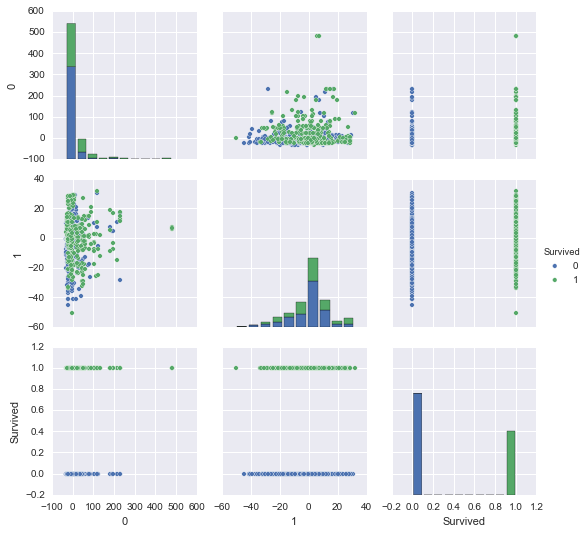

In [582]:
sns.pairplot(reduced_lableled_data, hue="Survived")

## randomforest

In [ ]:
""" Writing my first randomforest code.
Author : AstroDave
Date : 23rd September 2012
Revised: 15 April 2014
please see packages.python.org/milk/randomforests.html for more

""" 
import pandas as pd
import numpy as np
import csv as csv
from sklearn.ensemble import RandomForestClassifier

# Data cleanup
# TRAIN DATA
train_df = pd.read_csv('train.csv', header=0)        # Load the train file into a dataframe

# I need to convert all strings to integer classifiers.
# I need to fill in the missing values of the data and make it complete.

# female = 0, Male = 1
train_df['Gender'] = train_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Embarked from 'C', 'Q', 'S'
# Note this is not ideal: in translating categories to numbers, Port "2" is not 2 times greater than Port "1", etc.

# All missing Embarked -> just make them embark from most common place
if len(train_df.Embarked[ train_df.Embarked.isnull() ]) > 0:
    train_df.Embarked[ train_df.Embarked.isnull() ] = train_df.Embarked.dropna().mode().values

Ports = list(enumerate(np.unique(train_df['Embarked'])))    # determine all values of Embarked,
Ports_dict = { name : i for i, name in Ports }              # set up a dictionary in the form  Ports : index
train_df.Embarked = train_df.Embarked.map( lambda x: Ports_dict[x]).astype(int)     # Convert all Embark strings to int

# All the ages with no data -> make the median of all Ages
median_age = train_df['Age'].dropna().median()
if len(train_df.Age[ train_df.Age.isnull() ]) > 0:
    train_df.loc[ (train_df.Age.isnull()), 'Age'] = median_age

# Remove the Name column, Cabin, Ticket, and Sex (since I copied and filled it to Gender)
train_df = train_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'PassengerId'], axis=1) 


# TEST DATA
test_df = pd.read_csv('test.csv', header=0)        # Load the test file into a dataframe

# I need to do the same with the test data now, so that the columns are the same as the training data
# I need to convert all strings to integer classifiers:
# female = 0, Male = 1
test_df['Gender'] = test_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Embarked from 'C', 'Q', 'S'
# All missing Embarked -> just make them embark from most common place
if len(test_df.Embarked[ test_df.Embarked.isnull() ]) > 0:
    test_df.Embarked[ test_df.Embarked.isnull() ] = test_df.Embarked.dropna().mode().values
# Again convert all Embarked strings to int
test_df.Embarked = test_df.Embarked.map( lambda x: Ports_dict[x]).astype(int)


# All the ages with no data -> make the median of all Ages
median_age = test_df['Age'].dropna().median()
if len(test_df.Age[ test_df.Age.isnull() ]) > 0:
    test_df.loc[ (test_df.Age.isnull()), 'Age'] = median_age

# All the missing Fares -> assume median of their respective class
if len(test_df.Fare[ test_df.Fare.isnull() ]) > 0:
    median_fare = np.zeros(3)
    for f in range(0,3):                                              # loop 0 to 2
        median_fare[f] = test_df[ test_df.Pclass == f+1 ]['Fare'].dropna().median()
    for f in range(0,3):                                              # loop 0 to 2
        test_df.loc[ (test_df.Fare.isnull()) & (test_df.Pclass == f+1 ), 'Fare'] = median_fare[f]

# Collect the test data's PassengerIds before dropping it
ids = test_df['PassengerId'].values
# Remove the Name column, Cabin, Ticket, and Sex (since I copied and filled it to Gender)
test_df = test_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'PassengerId'], axis=1) 


# The data is now ready to go. So lets fit to the train, then predict to the test!
# Convert back to a numpy array
train_data = train_df.values
test_data = test_df.values


print 'Training...'
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit( train_data[0::,1::], train_data[0::,0] )

print 'Predicting...'
output = forest.predict(test_data).astype(int)


predictions_file = open("myfirstforest.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()
print 'Done.'
